In [8]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import re
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import boxcox
from scipy.stats import yeojohnson
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-data/heart_disease_uci.csv
/kaggle/input/students-performance-in-exams/StudentsPerformance.csv
/kaggle/input/students-random-number-dataset/stud-randnum-dataset.csv
/kaggle/input/dirty-dataset-to-practice-data-cleaning/my_file (1).csv


# Week 2 Briefing
This week, our goal is to learn the basics of statistical tools required for data engineering. There are four modules as part of this week's learning goals:
* Data cleaning
* Statistical queries on dataset
* Data visualization
* Data transformation

# Module 1: Data cleaning
Packages used: pandas, numpy, re, sklearn.impute
Steps: EDA, Missing data handling, removing duplicates, formatting and data type, string cleaning and standardization, outliers, validation, text cleaning.

In [9]:
# Load dataset
df = pd.read_csv('/kaggle/input/dirty-dataset-to-practice-data-cleaning/my_file (1).csv')
df.head() #preview first few rows to understand the structure


,Rank,Peak,All Time Peak,Actual gross,Actual gross(in 2022 dollars),Artist,Tour title,Year(s),Shows,Average gross,Ref.
0,1,1,2,"$780,000,000","$780,000,000",Taylor Swift,The Eras Tour †,2023–2024,56,"$13,928,571",[1]
1,2,1,7[2],"$579,800,000","$579,800,000",Beyoncé,Renaissance World Tour,2023,56,"$10,353,571",[3]
2,3,1[4],2[5],"$411,000,000","$560,622,615",Madonna,Sticky & Sweet Tour ‡[4][a],2008–2009,85,"$4,835,294",[6]
3,4,2[7],10[7],"$397,300,000","$454,751,555",Pink,Beautiful Trauma World Tour,2018–2019,156,"$2,546,795",[7]
4,5,2[4],NaN,"$345,675,146","$402,844,849",Taylor Swift,Reputation Stadium Tour,2018,53,"$6,522,173",[8]


In [10]:
df.info() #concise summary of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Rank                           20 non-null     int64 
 1   Peak                           9 non-null      object
 2   All Time Peak                  6 non-null      object
 3   Actual gross                   20 non-null     object
 4   Actual gross(in 2022 dollars)  20 non-null     object
 5   Artist                         20 non-null     object
 6   Tour title                     20 non-null     object
 7   Year(s)                        20 non-null     object
 8   Shows                          20 non-null     int64 
 9   Average gross                  20 non-null     object
 10  Ref.                           20 non-null     object
dtypes: int64(2), object(9)
memory usage: 1.8+ KB


In [11]:
df.columns #list the columns

Index(['Rank', 'Peak', 'All Time Peak', 'Actual gross',
       'Actual gross(in 2022 dollars)', 'Artist', 'Tour title', 'Year(s)',
       'Shows', 'Average gross', 'Ref.'],
      dtype='object')

In [12]:
#Exploratory data analysis: identify missing values, duplicates, data types, summary
print(df.isnull().sum())

Rank                              0
Peak                             11
All Time Peak                    14
Actual gross                      0
Actual gross(in 2022 dollars)     0
Artist                            0
Tour title                        0
Year(s)                           0
Shows                             0
Average gross                     0
Ref.                              0
dtype: int64


In [13]:
print(df.duplicated().sum())


0


In [14]:
print(df.describe(include='all'))


             Rank Peak All Time Peak  Actual gross  \
count   20.000000    9             6            20   
unique        NaN    7             6            20   
top           NaN    1             2  $780,000,000   
freq          NaN    2             1             1   
mean    10.450000  NaN           NaN           NaN   
std      5.942488  NaN           NaN           NaN   
min      1.000000  NaN           NaN           NaN   
25%      5.750000  NaN           NaN           NaN   
50%     10.500000  NaN           NaN           NaN   
75%     15.250000  NaN           NaN           NaN   
max     20.000000  NaN           NaN           NaN   

       Actual gross(in 2022 dollars)        Artist       Tour title  \
count                             20            20               20   
unique                            20             9               20   
top                     $780,000,000  Taylor Swift  The Eras Tour †   
freq                               1             4                1

In [15]:
print(df.dtypes)

Rank                              int64
Peak                             object
All Time Peak                    object
Actual gross                     object
Actual gross(in 2022 dollars)    object
Artist                           object
Tour title                       object
Year(s)                          object
Shows                             int64
Average gross                    object
Ref.                             object
dtype: object


In [16]:
#text cleaning using anonymous function lambda
df["Ref."]= df["Ref."].apply(lambda x : re.sub(r"[^a-zA-Z0-9]" , "" , x))
df

,Rank,Peak,All Time Peak,Actual gross,Actual gross(in 2022 dollars),Artist,Tour title,Year(s),Shows,Average gross,Ref.
0,1,1,2,"$780,000,000","$780,000,000",Taylor Swift,The Eras Tour †,2023–2024,56,"$13,928,571",1
1,2,1,7[2],"$579,800,000","$579,800,000",Beyoncé,Renaissance World Tour,2023,56,"$10,353,571",3
2,3,1[4],2[5],"$411,000,000","$560,622,615",Madonna,Sticky & Sweet Tour ‡[4][a],2008–2009,85,"$4,835,294",6
3,4,2[7],10[7],"$397,300,000","$454,751,555",Pink,Beautiful Trauma World Tour,2018–2019,156,"$2,546,795",7
4,5,2[4],NaN,"$345,675,146","$402,844,849",Taylor Swift,Reputation Stadium Tour,2018,53,"$6,522,173",8
5,6,2[4],10[9],"$305,158,363","$388,978,496",Madonna,The MDNA Tour,2012,88,"$3,467,709",9
6,7,2[10],NaN,"$280,000,000","$381,932,682",Celine Dion,Taking Chances World Tour,2008–2009,131,"$2,137,405",11
7,7,NaN,NaN,"$257,600,000","$257,600,000",Pink,Summer Carnival †,2023–2024,41,"$6,282,927",12
8,9,NaN,NaN,"$256,084,556","$312,258,401",Beyoncé,The Formation World Tour,2016,49,"$5,226,215",13
9,10,NaN,NaN,"$250,400,000","$309,141,878",Taylor Swift,The 1989 World Tour,2015,85,"$2,945,882",14


In [17]:
print([{col} for col in df.columns])

[{'Rank'}, {'Peak'}, {'All Time Peak'}, {'Actual gross'}, {'Actual gross(in 2022 dollars)'}, {'Artist'}, {'Tour title'}, {'Year(s)'}, {'Shows'}, {'Average gross'}, {'Ref.'}]


In [18]:
#remove unwarranted spaces
df.columns = df.columns.str.replace('\xa0', ' ', regex=False)
print([col for col in df.columns])

['Rank', 'Peak', 'All Time Peak', 'Actual gross', 'Actual gross(in 2022 dollars)', 'Artist', 'Tour title', 'Year(s)', 'Shows', 'Average gross', 'Ref.']


In [19]:
#cleaning text
def clean_text(text):
    text = re.sub(r"\[\s*.*?\s*\]", "" , text)
    text = re.sub(r"[^a-zA-Z0-9]", "" , text)
    return text 
columns = ["Actual gross" , "Actual gross(in 2022 dollars)" , "Average gross"]
for column in columns:
    df[column] = df[column].apply(clean_text)
df

,Rank,Peak,All Time Peak,Actual gross,Actual gross(in 2022 dollars),Artist,Tour title,Year(s),Shows,Average gross,Ref.
0,1,1,2,780000000,780000000,Taylor Swift,The Eras Tour †,2023–2024,56,13928571,1
1,2,1,7[2],579800000,579800000,Beyoncé,Renaissance World Tour,2023,56,10353571,3
2,3,1[4],2[5],411000000,560622615,Madonna,Sticky & Sweet Tour ‡[4][a],2008–2009,85,4835294,6
3,4,2[7],10[7],397300000,454751555,Pink,Beautiful Trauma World Tour,2018–2019,156,2546795,7
4,5,2[4],NaN,345675146,402844849,Taylor Swift,Reputation Stadium Tour,2018,53,6522173,8
5,6,2[4],10[9],305158363,388978496,Madonna,The MDNA Tour,2012,88,3467709,9
6,7,2[10],NaN,280000000,381932682,Celine Dion,Taking Chances World Tour,2008–2009,131,2137405,11
7,7,NaN,NaN,257600000,257600000,Pink,Summer Carnival †,2023–2024,41,6282927,12
8,9,NaN,NaN,256084556,312258401,Beyoncé,The Formation World Tour,2016,49,5226215,13
9,10,NaN,NaN,250400000,309141878,Taylor Swift,The 1989 World Tour,2015,85,2945882,14


In [20]:
#cleaning texts
def clean_peak(text):
    if not pd.isna(text):
        text =  re.sub(r"\[\s*.*?\s*\]", "" , text)
    return text
columns = ["Peak" , "All Time Peak"]
for column in columns:
    df[column] = df[column].apply(clean_peak)
df

,Rank,Peak,All Time Peak,Actual gross,Actual gross(in 2022 dollars),Artist,Tour title,Year(s),Shows,Average gross,Ref.
0,1,1,2,780000000,780000000,Taylor Swift,The Eras Tour †,2023–2024,56,13928571,1
1,2,1,7,579800000,579800000,Beyoncé,Renaissance World Tour,2023,56,10353571,3
2,3,1,2,411000000,560622615,Madonna,Sticky & Sweet Tour ‡[4][a],2008–2009,85,4835294,6
3,4,2,10,397300000,454751555,Pink,Beautiful Trauma World Tour,2018–2019,156,2546795,7
4,5,2,NaN,345675146,402844849,Taylor Swift,Reputation Stadium Tour,2018,53,6522173,8
5,6,2,10,305158363,388978496,Madonna,The MDNA Tour,2012,88,3467709,9
6,7,2,NaN,280000000,381932682,Celine Dion,Taking Chances World Tour,2008–2009,131,2137405,11
7,7,NaN,NaN,257600000,257600000,Pink,Summer Carnival †,2023–2024,41,6282927,12
8,9,NaN,NaN,256084556,312258401,Beyoncé,The Formation World Tour,2016,49,5226215,13
9,10,NaN,NaN,250400000,309141878,Taylor Swift,The 1989 World Tour,2015,85,2945882,14


In [21]:
#remove wierd characters from the strings
def clean_title(text):
    text =  re.sub(r"[^a-zA-Z ]", "" , text)
    return text
df["Tour title"] = df["Tour title"].apply(clean_title)

In [22]:
df

,Rank,Peak,All Time Peak,Actual gross,Actual gross(in 2022 dollars),Artist,Tour title,Year(s),Shows,Average gross,Ref.
0,1,1,2,780000000,780000000,Taylor Swift,The Eras Tour,2023–2024,56,13928571,1
1,2,1,7,579800000,579800000,Beyoncé,Renaissance World Tour,2023,56,10353571,3
2,3,1,2,411000000,560622615,Madonna,Sticky Sweet Tour a,2008–2009,85,4835294,6
3,4,2,10,397300000,454751555,Pink,Beautiful Trauma World Tour,2018–2019,156,2546795,7
4,5,2,NaN,345675146,402844849,Taylor Swift,Reputation Stadium Tour,2018,53,6522173,8
5,6,2,10,305158363,388978496,Madonna,The MDNA Tour,2012,88,3467709,9
6,7,2,NaN,280000000,381932682,Celine Dion,Taking Chances World Tour,2008–2009,131,2137405,11
7,7,NaN,NaN,257600000,257600000,Pink,Summer Carnival,2023–2024,41,6282927,12
8,9,NaN,NaN,256084556,312258401,Beyoncé,The Formation World Tour,2016,49,5226215,13
9,10,NaN,NaN,250400000,309141878,Taylor Swift,The World Tour,2015,85,2945882,14


In [23]:
#Fixing inconsistent data
df["Ref."] = df["Ref."].replace("1516" , "16")
df["Ref."] = df["Ref."].replace("d" , "5")

In [24]:
df

,Rank,Peak,All Time Peak,Actual gross,Actual gross(in 2022 dollars),Artist,Tour title,Year(s),Shows,Average gross,Ref.
0,1,1,2,780000000,780000000,Taylor Swift,The Eras Tour,2023–2024,56,13928571,1
1,2,1,7,579800000,579800000,Beyoncé,Renaissance World Tour,2023,56,10353571,3
2,3,1,2,411000000,560622615,Madonna,Sticky Sweet Tour a,2008–2009,85,4835294,6
3,4,2,10,397300000,454751555,Pink,Beautiful Trauma World Tour,2018–2019,156,2546795,7
4,5,2,NaN,345675146,402844849,Taylor Swift,Reputation Stadium Tour,2018,53,6522173,8
5,6,2,10,305158363,388978496,Madonna,The MDNA Tour,2012,88,3467709,9
6,7,2,NaN,280000000,381932682,Celine Dion,Taking Chances World Tour,2008–2009,131,2137405,11
7,7,NaN,NaN,257600000,257600000,Pink,Summer Carnival,2023–2024,41,6282927,12
8,9,NaN,NaN,256084556,312258401,Beyoncé,The Formation World Tour,2016,49,5226215,13
9,10,NaN,NaN,250400000,309141878,Taylor Swift,The World Tour,2015,85,2945882,14


In [25]:
#Fixing numerical columns data type; convert to float
numeric_cols = ["Actual gross" , "Actual gross(in 2022 dollars)" 
                , "Average gross" , "Shows" , "Ref." , "Peak" , "All Time Peak"]
for cols in numeric_cols :
    df[cols] = df[cols].astype("float")

In [26]:
df

,Rank,Peak,All Time Peak,Actual gross,Actual gross(in 2022 dollars),Artist,Tour title,Year(s),Shows,Average gross,Ref.
0,1,1.0,2.0,780000000.0,780000000.0,Taylor Swift,The Eras Tour,2023–2024,56.0,13928571.0,1.0
1,2,1.0,7.0,579800000.0,579800000.0,Beyoncé,Renaissance World Tour,2023,56.0,10353571.0,3.0
2,3,1.0,2.0,411000000.0,560622615.0,Madonna,Sticky Sweet Tour a,2008–2009,85.0,4835294.0,6.0
3,4,2.0,10.0,397300000.0,454751555.0,Pink,Beautiful Trauma World Tour,2018–2019,156.0,2546795.0,7.0
4,5,2.0,NaN,345675146.0,402844849.0,Taylor Swift,Reputation Stadium Tour,2018,53.0,6522173.0,8.0
5,6,2.0,10.0,305158363.0,388978496.0,Madonna,The MDNA Tour,2012,88.0,3467709.0,9.0
6,7,2.0,NaN,280000000.0,381932682.0,Celine Dion,Taking Chances World Tour,2008–2009,131.0,2137405.0,11.0
7,7,NaN,NaN,257600000.0,257600000.0,Pink,Summer Carnival,2023–2024,41.0,6282927.0,12.0
8,9,NaN,NaN,256084556.0,312258401.0,Beyoncé,The Formation World Tour,2016,49.0,5226215.0,13.0
9,10,NaN,NaN,250400000.0,309141878.0,Taylor Swift,The World Tour,2015,85.0,2945882.0,14.0


In [27]:
#drop columns with too many missing values
df = df.drop(["All Time Peak" , "Peak"] , axis =1)
df

,Rank,Actual gross,Actual gross(in 2022 dollars),Artist,Tour title,Year(s),Shows,Average gross,Ref.
0,1,780000000.0,780000000.0,Taylor Swift,The Eras Tour,2023–2024,56.0,13928571.0,1.0
1,2,579800000.0,579800000.0,Beyoncé,Renaissance World Tour,2023,56.0,10353571.0,3.0
2,3,411000000.0,560622615.0,Madonna,Sticky Sweet Tour a,2008–2009,85.0,4835294.0,6.0
3,4,397300000.0,454751555.0,Pink,Beautiful Trauma World Tour,2018–2019,156.0,2546795.0,7.0
4,5,345675146.0,402844849.0,Taylor Swift,Reputation Stadium Tour,2018,53.0,6522173.0,8.0
5,6,305158363.0,388978496.0,Madonna,The MDNA Tour,2012,88.0,3467709.0,9.0
6,7,280000000.0,381932682.0,Celine Dion,Taking Chances World Tour,2008–2009,131.0,2137405.0,11.0
7,7,257600000.0,257600000.0,Pink,Summer Carnival,2023–2024,41.0,6282927.0,12.0
8,9,256084556.0,312258401.0,Beyoncé,The Formation World Tour,2016,49.0,5226215.0,13.0
9,10,250400000.0,309141878.0,Taylor Swift,The World Tour,2015,85.0,2945882.0,14.0


In [28]:
#Final validation
print(df.isnull().sum())
print(df.describe(include='all'))
print(df.head())

# Save cleaned version
df.to_csv('dirty_dataset_cleaned.csv', index=False)


Rank                             0
Actual gross                     0
Actual gross(in 2022 dollars)    0
Artist                           0
Tour title                       0
Year(s)                          0
Shows                            0
Average gross                    0
Ref.                             0
dtype: int64
             Rank  Actual gross  Actual gross(in 2022 dollars)        Artist  \
count   20.000000  2.000000e+01                   2.000000e+01            20   
unique        NaN           NaN                            NaN             9   
top           NaN           NaN                            NaN  Taylor Swift   
freq          NaN           NaN                            NaN             4   
mean    10.450000  2.879509e+08                   3.438781e+08           NaN   
std      5.942488  1.563284e+08                   1.514627e+08           NaN   
min      1.000000  1.500000e+08                   1.854231e+08           NaN   
25%      5.750000  1.915000e+08 

# Module 2: Querying data, statistical properties and error
Packages used: pandas

In [29]:
# Load data 
df = pd.read_csv("/kaggle/input/students-performance-in-exams/StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [30]:
#Exploration: looking for numerical data
numeric_cols = ['math score', 'reading score', 'writing score']
df[numeric_cols].describe()

#Exercise 1: Add a new column that computes average score of a student across the three subjects

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [47]:
df["Average score"] = df[["math score", "reading score", "writing score"]].mean(axis = 1)
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Average score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


In [31]:
# Mean, mode and median
print("Mean Math Score:", df['math score'].mean())
print("Median Math Score:", df['math score'].median())
print("Mode Math Score:", df['math score'].mode()[0])

#Exercise 2: Compute mean, median, mode for reading and writing scores.

Mean Math Score: 66.089
Median Math Score: 66.0
Mode Math Score: 65


In [49]:
print("Mean reading score:", df["reading score"].mean())
print("Median reading score:", df["reading score"].median())
print("Mode reading score:", df["reading score"].mode())
print("Mean writing score:", df["writing score"].mean())
print("Median writing score:", df["writing score"].median())
print("Mode writing score:", df["writing score"].mode())

Mean reading score: 69.169
Median reading score: 70.0
Mode reading score: 0    72
Name: reading score, dtype: int64
Mean writing score: 68.054
Median writing score: 69.0
Mode writing score: 0    74
Name: writing score, dtype: int64


In [32]:
df['math score'][1]

69

In [33]:
# Measuring spread of data
print("Standard Deviation (Math):", df['math score'].std())
print("Variance (Math):", df['math score'].var())
print("Range (Math):", df['math score'].max() - df['math score'].min())

#Exercise 3: Repeat above steps for other subjects. What do you infer about subject difficulty?

Standard Deviation (Math): 15.163080096009468
Variance (Math): 229.91899799799847
Range (Math): 100


In [173]:
print("Standard Deviation (Reading):",df["reading score"].std())
print("Variance (Reading):", df["reading score"].var())
print("Range (Reading):", df["reading score"].max() - df["reading score"].min())
print("Standard Deviation (Writing):",df["writing score"].std())
print("Variance (Writing):", df["writing score"].var())
print("Range (Writing):", df["writing score"].max() - df["writing score"].min())
print("reading scores are slightly more consistent with a lower range(83) and variability than writing, which has a higher range(90) and spread. This suggests writing might be a bit more difficult or varied in student performance compared to raeding.")

Standard Deviation (Reading): 14.60019193725222
Variance (Reading): 213.1656046046047
Range (Reading): 83
Standard Deviation (Writing): 15.195657010869642
Variance (Writing): 230.90799199199168
Range (Writing): 90
reading scores are slightly more consistent with a lower range(83) and variability than writing, which has a higher range(90) and spread. This suggests writing might be a bit more difficult or varied in student performance compared to raeding.


# Module 3: Data visualization 
Packages used: seaborn, matplotlib 

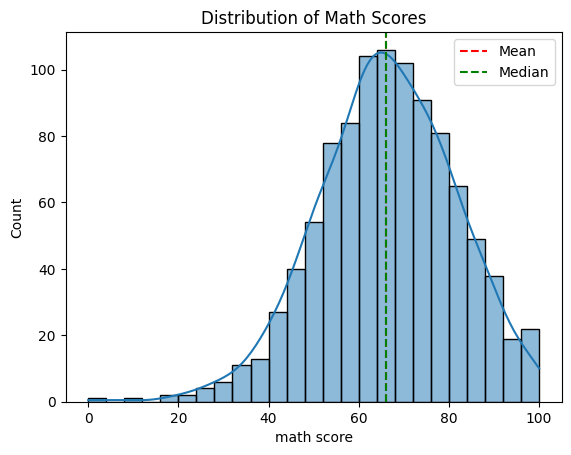

In [34]:
sns.histplot(df['math score'], kde=True)
plt.axvline(df['math score'].mean(), color='red', linestyle='--', label='Mean')
plt.axvline(df['math score'].median(), color='green', linestyle='--', label='Median')
plt.legend()
plt.title("Distribution of Math Scores")
plt.show()

#Exercise 4: Repeat for reading and writing scores

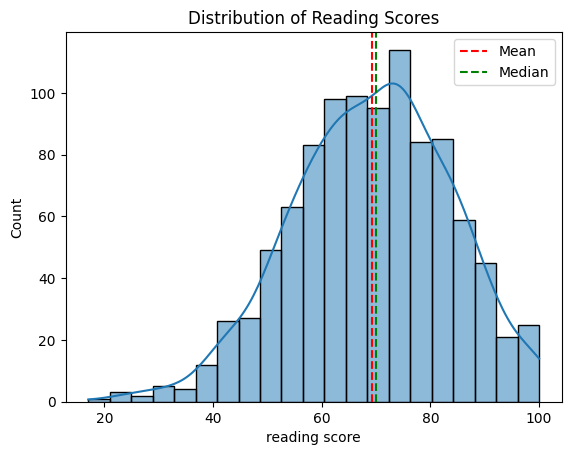

In [51]:
sns.histplot(df['reading score'], kde=True)
plt.axvline(df['reading score'].mean(), color='red', linestyle='--', label='Mean')
plt.axvline(df['reading score'].median(), color='green', linestyle='--', label='Median')
plt.legend()
plt.title("Distribution of Reading Scores")
plt.show()

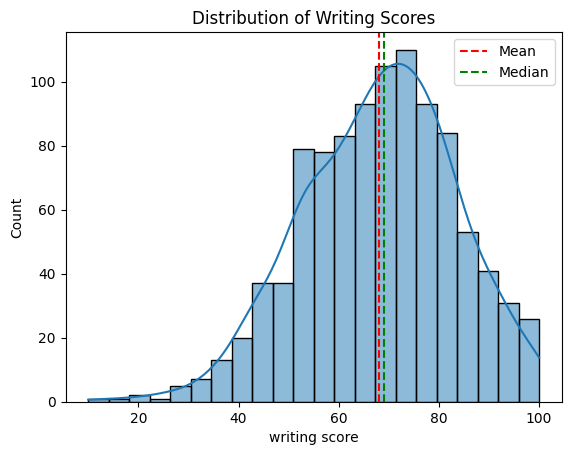

In [52]:
sns.histplot(df['writing score'], kde=True)
plt.axvline(df['writing score'].mean(), color='red', linestyle='--', label='Mean')
plt.axvline(df['writing score'].median(), color='green', linestyle='--', label='Median')
plt.legend()
plt.title("Distribution of Writing Scores")
plt.show()

Text(0.5, 1.0, 'Math Score vs Test Preparation')

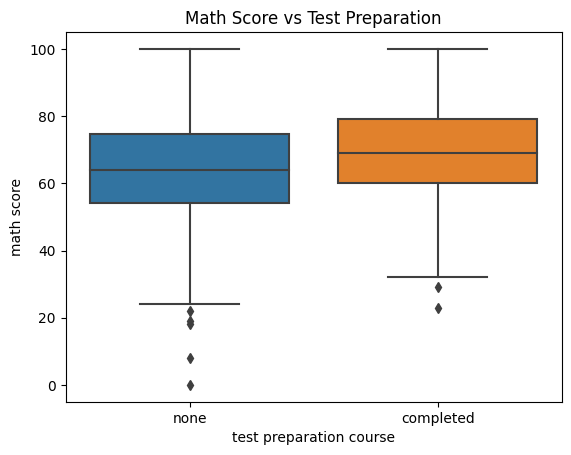

In [35]:
#Comarisons using visualization
sns.boxplot(x='test preparation course', y='math score', data=df)
plt.title("Math Score vs Test Preparation")

#Exercise 5: Try changing legends, title, axis labels

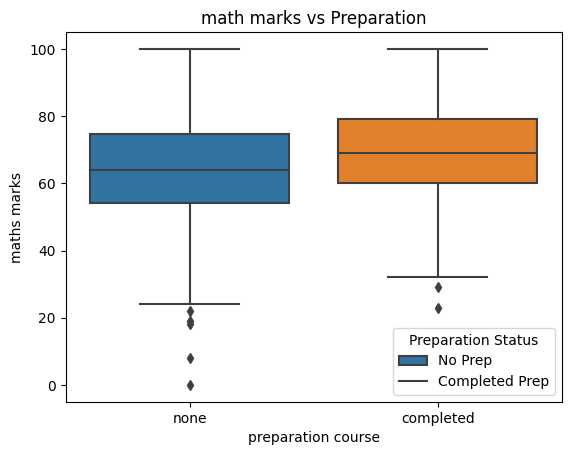

In [62]:
sns.boxplot(x='test preparation course', y='math score', data=df)
plt.xlabel("preparation course")
plt.ylabel("maths marks")
plt.title("math marks vs Preparation")
plt.legend(["No Prep", "Completed Prep"], title="Preparation Status")


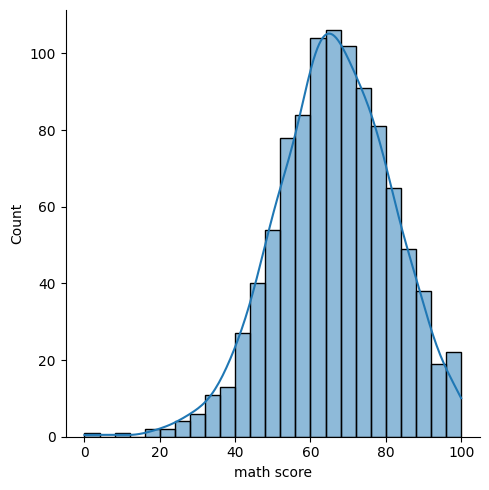

In [36]:
sns.displot(df['math score'], kde=True)

## Module 3.1: Generating a normal distribution 
* np.random.normal(loc=mu, scale=sigma, size=n) generates random numbers from a normal (Gaussian) distribution.
* plt.hist(..., density=True) makes the histogram show a probability density, not just raw counts.
* The red line overlays the theoretical probability density function (PDF) for comparison.

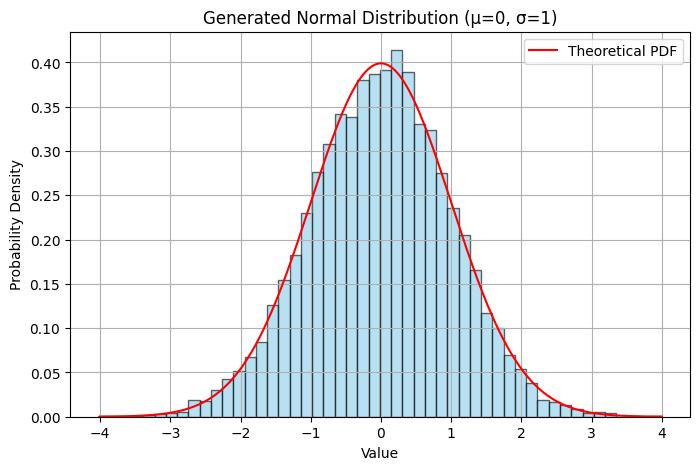

In [37]:
# Parameters for the normal distribution
mu = 0       # Mean
sigma = 1    # Standard deviation
n = 10000    # Number of samples

# Generate random samples from a normal distribution
data = np.random.normal(loc=mu, scale=sigma, size=n)

# Plot histogram of the data
plt.figure(figsize=(8, 5))
plt.hist(data, bins=50, density=True, alpha=0.6, color='skyblue', edgecolor='black')

# Plot the theoretical normal distribution curve
from scipy.stats import norm
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
plt.plot(x, norm.pdf(x, mu, sigma), 'r', label='Theoretical PDF')

plt.title("Generated Normal Distribution (μ=0, σ=1)")
plt.xlabel("Value")
plt.ylabel("Probability Density")
plt.legend()
plt.grid(True)
plt.show()


## Module 3.2: Generating a theoretical poisson/gaussian distribution

Text(0.5, 1.0, 'Poisson Distribution (μ=5)')

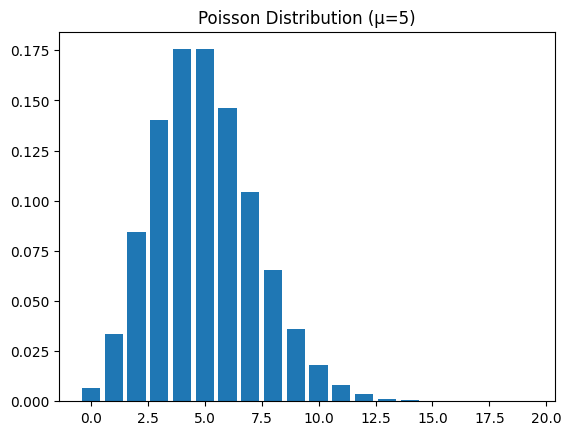

In [38]:
#Poisson distribution
from scipy.stats import poisson

x = np.arange(0, 20)
pmf = poisson.pmf(x, mu=5)
plt.bar(x, pmf)
plt.title("Poisson Distribution (μ=5)")

Text(0.5, 1.0, 'Gaussian distribution')

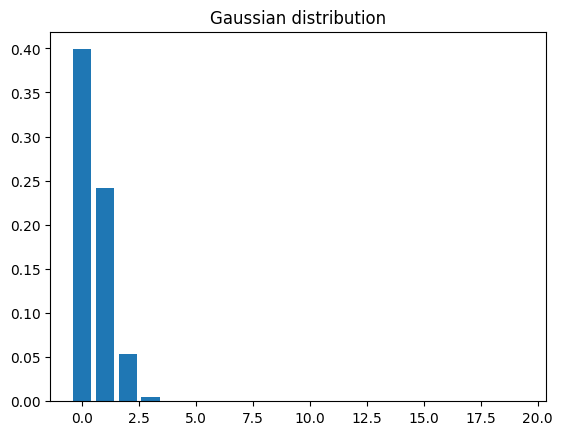

In [39]:
#Gaussian distribution
pdf=norm.pdf(x,mu,sigma)
plt.bar(x,pdf)
plt.title("Gaussian distribution")

# Module 4: Data transformations - demonstrating Log transformation
Packages used: matplotlib, seaborn, scipy.stats

Dataset: heart-disease-uci/heart.csv

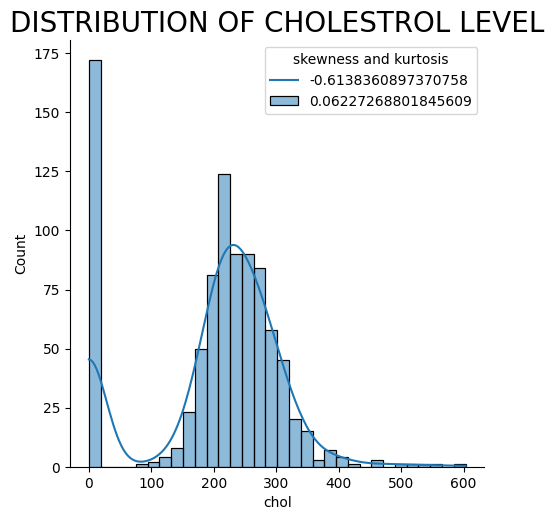

In [40]:
#Loading data
dc=pd.read_csv("/kaggle/input/heart-disease-data/heart_disease_uci.csv")

#Plotting the original cholestrol distribution data
sns.displot(dc["chol"],kde=True)
plt.title("DISTRIBUTION OF CHOLESTROL LEVEL",fontsize=20)
skewness=str(dc["chol"].skew()) #measures the skewness
kurtosis=str(dc["chol"].kurt())
plt.legend([skewness,kurtosis],title=("skewness and kurtosis"))
plt.show()

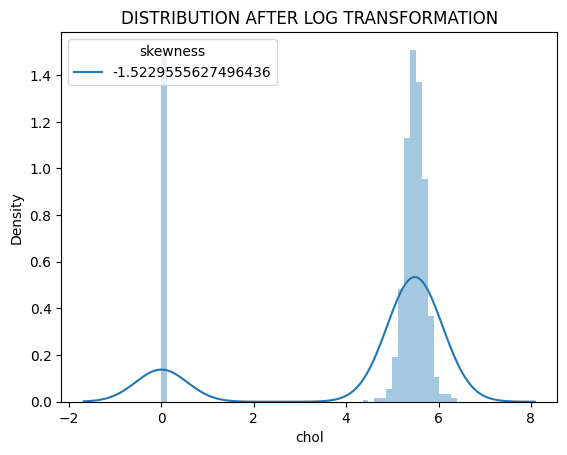

In [41]:
#Log transformation
log_target=np.log1p(dc["chol"])
ax=sns.distplot(log_target)
plt.title("DISTRIBUTION AFTER LOG TRANSFORMATION",)
skewness=str(log_target.skew())
plt.legend([skewness],title=("skewness"))
plt.show()

# Exercise 6: Repeat this for square root and other transformations.

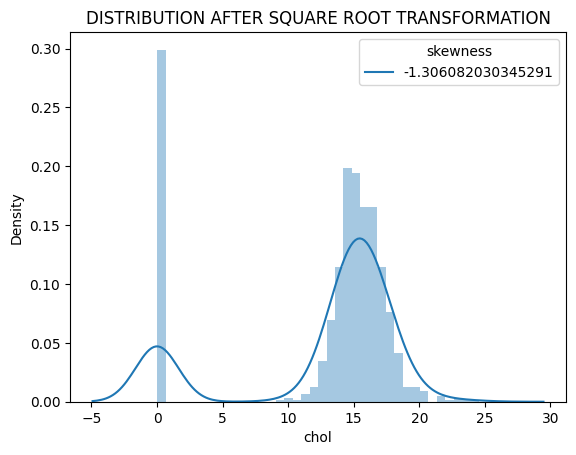

In [63]:
sqrt_target=np.sqrt(dc["chol"])
ax=sns.distplot(sqrt_target)
plt.title("DISTRIBUTION AFTER SQUARE ROOT TRANSFORMATION",)
skewness=str(sqrt_target.skew())
plt.legend([skewness],title=("skewness"))
plt.show()


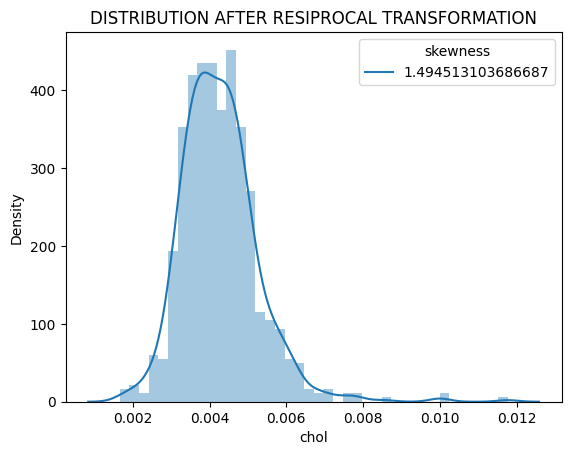

In [70]:
chol = dc["chol"].replace(0, np.nan)
resiprocal_target= 1/chol
ax=sns.distplot(resiprocal_target, kde = True)
plt.title("DISTRIBUTION AFTER RESIPROCAL TRANSFORMATION",)
skewness=str(resiprocal_target.skew())
plt.legend([skewness],title=("skewness"))
plt.show()


Optimal λ (lambda): 0.005288592849488383


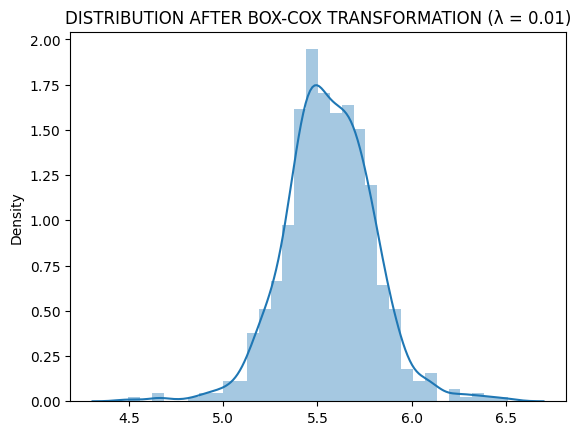

In [73]:
chol = dc["chol"]
chol = chol[chol > 0]
chol_boxcox, lambda_bc = stats.boxcox(chol)
print(f"Optimal λ (lambda): {lambda_bc}")
sns.distplot(chol_boxcox, kde=True)
plt.title(f"DISTRIBUTION AFTER BOX-COX TRANSFORMATION (λ = {lambda_bc:.2f})")
plt.show()


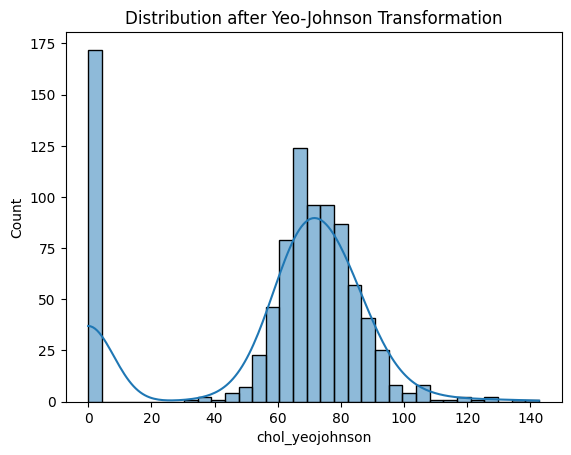

In [76]:
from sklearn.preprocessing import PowerTransformer
data = dc[["chol"]]
pt = PowerTransformer(method='yeo-johnson', standardize=False)
data_yeojohnson = pt.fit_transform(data)
data_yeojohnson_series = pd.Series(data_yeojohnson.flatten(), name="chol_yeojohnson")
sns.histplot(data_yeojohnson_series, kde=True)
plt.title("Distribution after Yeo-Johnson Transformation")
plt.show()


In [83]:
ds = pd.read_csv("/kaggle/input/students-random-number-dataset/stud-randnum-dataset.csv")
ds.head()

,Name,Number,Timedelay,Timestamp
0,arun,1,0,19:08:23
1,arun,3,1,19:08:24
2,arun,4,1,19:08:25
3,arun,5,1,19:08:26
4,arun,7,1,19:08:27


In [84]:
ds.info

<bound method DataFrame.info of        Name Number Timedelay Timestamp
0      arun      1         0  19:08:23
1      arun      3         1  19:08:24
2      arun      4         1  19:08:25
3      arun      5         1  19:08:26
4      arun      7         1  19:08:27
...     ...    ...       ...       ...
1572  leave      2      5.07   12:33.3
1573   itna      5       9.4   12:42.7
1574   okkk      4      5.59   12:48.3
1575   well      5      7.14   12:55.5
1576   then      9      3.96   12:59.4

[1577 rows x 4 columns]>

In [85]:
ds.columns

Index(['Name', 'Number', 'Timedelay', 'Timestamp'], dtype='object')

In [87]:
print(ds.isnull().sum())

Name         15
Number       15
Timedelay    16
Timestamp    38
dtype: int64


In [88]:
print(ds.duplicated().sum())

40


In [89]:
print(ds.describe(include = "all"))

            Name Number Timedelay     Timestamp
count       1562   1562      1561          1539
unique        55     13       994           565
top     Sri Dutt      5         1  8/3/25 13:14
freq         223    189       160            79


In [90]:
print(ds.dtypes)

Name         object
Number       object
Timedelay    object
Timestamp    object
dtype: object


In [177]:
 ds["Ref."] = ds["Timestamp"].astype(str).apply(lambda x: re.sub(r"[^a-zA-Z0-9]", "", x))
print(ds.columns.tolist())
ds

['Name', 'Number', 'Timedelay', 'Timestamp', 'Ref.']


,Name,Number,Timedelay,Timestamp,Ref.
0,arun,10,0,190823,190823
1,arun,30,1,190824,190824
2,arun,40,1,190825,190825
3,arun,50,1,190826,190826
4,arun,70,1,190827,190827
...,...,...,...,...,...
1572,leave,20,507,12333,12333
1573,itna,50,94,12427,12427
1574,okkk,40,559,12483,12483
1575,well,50,714,12555,12555


In [99]:
print([{col} for col in ds.columns])

[{'Name'}, {'Number'}, {'Timedelay'}, {'Timestamp'}, {'Ref.'}]


In [101]:
ds.columns = ds.columns.str.replace("\xa0"," ", regex = False)
print([col for col in ds.columns])

['Name', 'Number', 'Timedelay', 'Timestamp', 'Ref.']


In [176]:
def clean_text(text):
    text = str(text)
    text = re.sub(r"\[\s*.*?\s*\]", "", text)
    text = re.sub(r"[^a-zA-Z0-9]", "", text)
    return text

columns = ['Name', 'Number', 'Timedelay', 'Timestamp']
for column in columns:
    ds[column] = ds[column].apply(clean_text)

ds


,Name,Number,Timedelay,Timestamp
0,arun,10,0,190823
1,arun,30,1,190824
2,arun,40,1,190825
3,arun,50,1,190826
4,arun,70,1,190827
...,...,...,...,...
1572,leave,20,507,12333
1573,itna,50,94,12427
1574,okkk,40,559,12483
1575,well,50,714,12555


In [175]:
 numeric_cols = ['Number']
 for cols in numeric_cols :
     ds[cols] = ds[cols].astype("float")
ds

,Name,Number,Timedelay,Timestamp
0,arun,1.0,0,19:08:23
1,arun,3.0,1,19:08:24
2,arun,4.0,1,19:08:25
3,arun,5.0,1,19:08:26
4,arun,7.0,1,19:08:27
...,...,...,...,...
1572,leave,2.0,5.07,12:33.3
1573,itna,5.0,9.4,12:42.7
1574,okkk,4.0,5.59,12:48.3
1575,well,5.0,7.14,12:55.5


In [114]:
ds = ds.drop(["Number" ] , axis =1)
ds

,Name,Timedelay,Timestamp,Ref.
0,arun,0,190823,190823
1,arun,1,190824,190824
2,arun,1,190825,190825
3,arun,1,190826,190826
4,arun,1,190827,190827
...,...,...,...,...
1572,leave,507,12333,12333
1573,itna,94,12427,12427
1574,okkk,559,12483,12483
1575,well,714,12555,12555


In [115]:
print(ds.isnull().sum())
print(ds.describe(include='all'))
print(ds.head())

# Save cleaned version
ds.to_csv('dirty_dataset_cleaned.csv', index=False)


Name         0
Timedelay    0
Timestamp    0
Ref.         0
dtype: int64
           Name Timedelay Timestamp      Ref.
count      1577      1577      1577      1577
unique       55       995       566       566
top     SriDutt         1  83251314  83251314
freq        223       160        79        79
   Name Timedelay Timestamp    Ref.
0  arun         0    190823  190823
1  arun         1    190824  190824
2  arun         1    190825  190825
3  arun         1    190826  190826
4  arun         1    190827  190827


In [136]:
print("Standard Deviation (Number):", ds['Number'].std())
print("Variance (Number):", ds['Number'].var())
print("Range (Number):", ds['Number'].max() - ds['Number'].min())


Standard Deviation (Number): 2.748591058642696
Variance (Number): 7.554752807650576
Range (Number): 9


In [137]:
print("Mean Number:", ds['Number'].mean())
print("Median Number:", ds['Number'].median())
print("Mode Number:", ds['Number'].mode()[0])


Mean Number: 4.642358909321496
Median Number: 5.0
Mode Number: 5


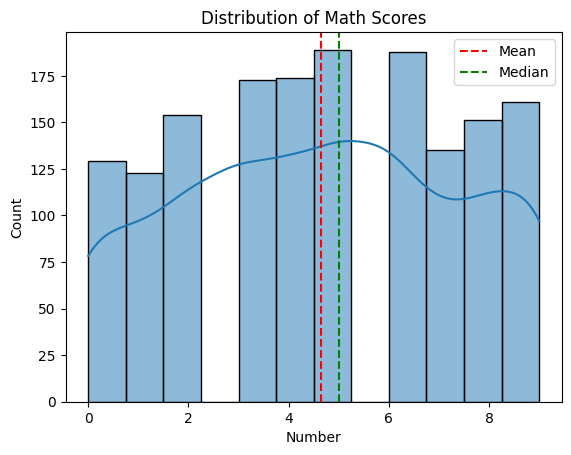

In [134]:
 sns.histplot(ds['Number'].astype(int), kde=True)
 plt.axvline(ds['Number'].astype(int).mean(), color='red', linestyle='--', label='Mean')
 plt.axvline(ds['Number'].astype(int).median(), color='green', linestyle='--', label='Median')
plt.legend()
 plt.title("Distribution of Math Scores")
 plt.show()

In [133]:
ds['Number'] = pd.to_numeric(ds['Number'], errors='coerce').fillna(0).astype(int)


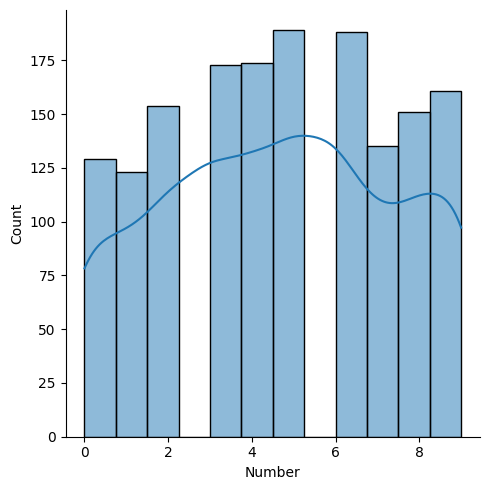

In [138]:
sns.displot(ds['Number'], kde=True)

Text(0.5, 1.0, 'Poisson Distribution (μ=5)')

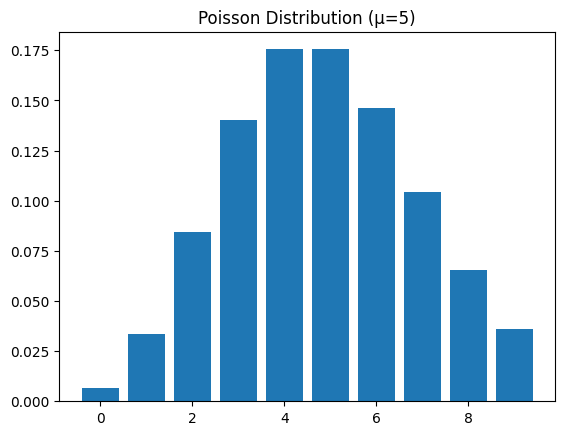

In [139]:
#Poisson distribution
from scipy.stats import poisson

x = ds["Number"]
pmf = poisson.pmf(x, mu=5)
plt.bar(x, pmf)
plt.title("Poisson Distribution (μ=5)")

Text(0.5, 1.0, 'Gaussian distribution')

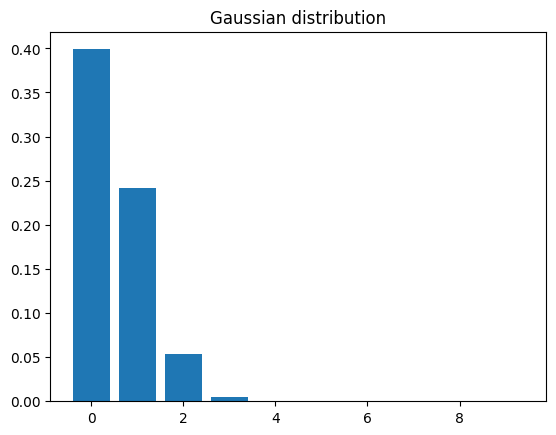

In [140]:
pdf=norm.pdf(x,mu,sigma)
plt.bar(x,pdf)
plt.title("Gaussian distribution")

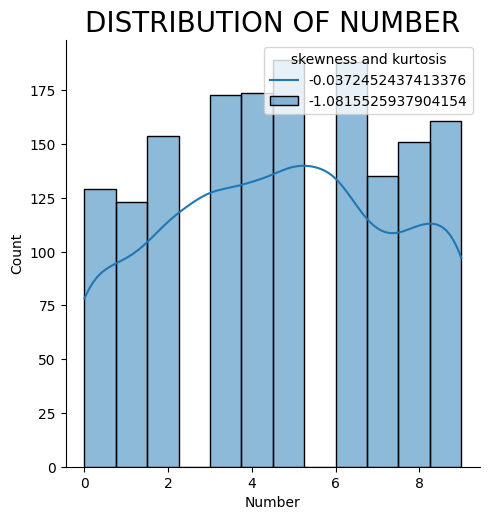

In [142]:
#Plotting the original cholestrol distribution data
sns.displot(ds["Number"],kde=True)
plt.title("DISTRIBUTION OF NUMBER",fontsize=20)
skewness=str(ds["Number"].skew()) #measures the skewness
kurtosis=str(ds["Number"].kurt())
plt.legend([skewness,kurtosis],title=("skewness and kurtosis"))
plt.show()

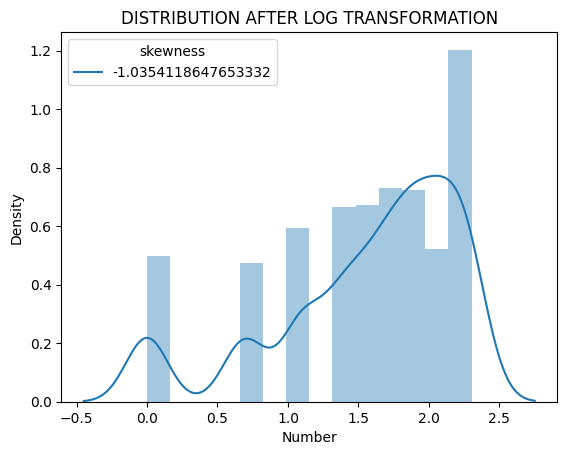

In [143]:
log_target=np.log1p(ds["Number"])
ax=sns.distplot(log_target)
plt.title("DISTRIBUTION AFTER LOG TRANSFORMATION",)
skewness=str(log_target.skew())
plt.legend([skewness],title=("skewness"))
plt.show()

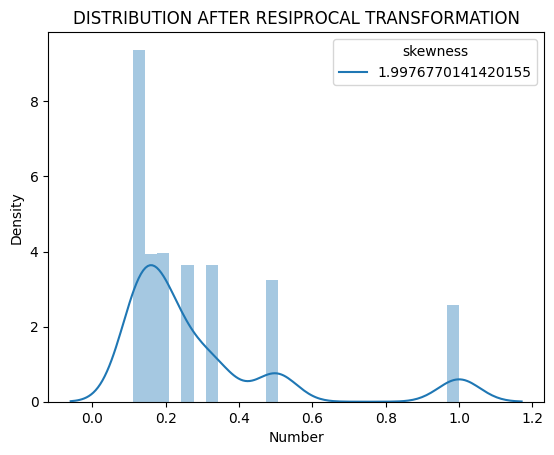

In [144]:
num = ds["Number"].replace(0, np.nan)
resiprocal_target= 1/num
ax=sns.distplot(resiprocal_target, kde = True)
plt.title("DISTRIBUTION AFTER RESIPROCAL TRANSFORMATION",)
skewness=str(resiprocal_target.skew())
plt.legend([skewness],title=("skewness"))
plt.show()


Optimal λ (lambda): 0.7438185218766024


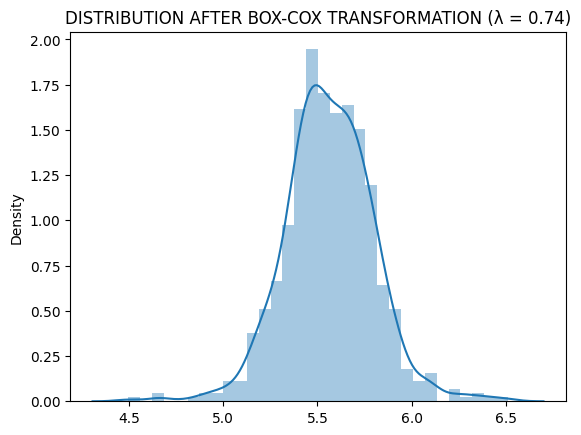

In [145]:
num = ds["Number"]
num = num[num > 0]
num_boxcox, lambda_bc = stats.boxcox(num)
print(f"Optimal λ (lambda): {lambda_bc}")
sns.distplot(chol_boxcox, kde=True)
plt.title(f"DISTRIBUTION AFTER BOX-COX TRANSFORMATION (λ = {lambda_bc:.2f})")
plt.show()


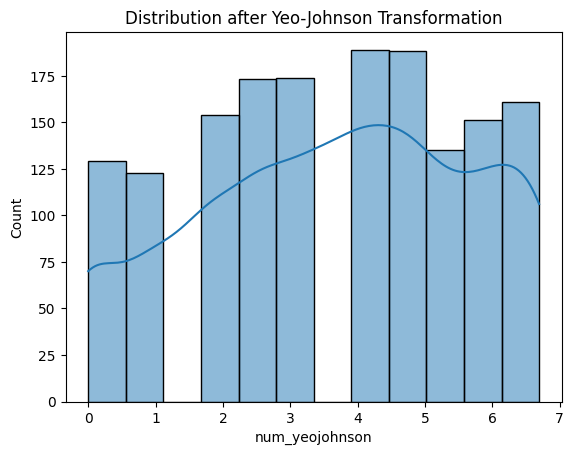

In [147]:
from sklearn.preprocessing import PowerTransformer
data = ds[["Number"]]
pt = PowerTransformer(method='yeo-johnson', standardize=False)
data_yeojohnson = pt.fit_transform(data)
data_yeojohnson_series = pd.Series(data_yeojohnson.flatten(), name="num_yeojohnson")
sns.histplot(data_yeojohnson_series, kde=True)
plt.title("Distribution after Yeo-Johnson Transformation")
plt.show()


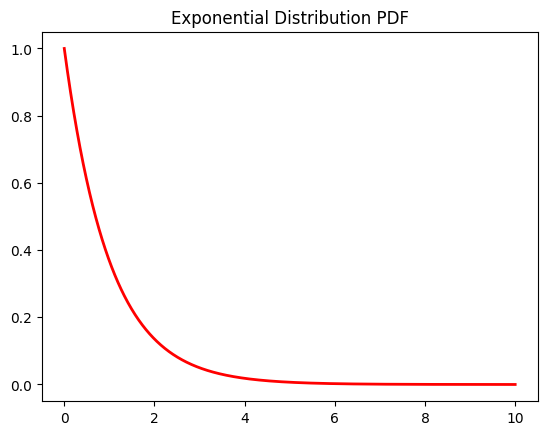

In [153]:
lambda_p = 1
x = np.linspace(0, 10, 1000)
pdf = lambda_p * np.exp(-lambda_p * x)

plt.plot(x, pdf, 'r-', lw=2)
plt.title("Exponential Distribution PDF")
plt.show()


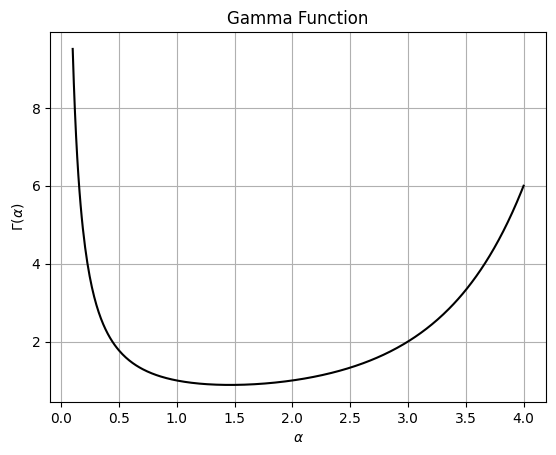

In [156]:
from scipy.special import gamma  
alpha = np.linspace(0.1, 4, 400)  
gamma_values = gamma(alpha)

plt.plot(alpha, gamma_values, color='black')
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$\Gamma(\alpha)$')
plt.title('Gamma Function')
plt.grid(True)
plt.show()

In [160]:
de = pd.read_csv("/kaggle/input/students-performance-in-exams/StudentsPerformance.csv")
de.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [161]:
de["Average score"] = de[["math score", "reading score", "writing score"]].mean(axis = 1)
de.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Average score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


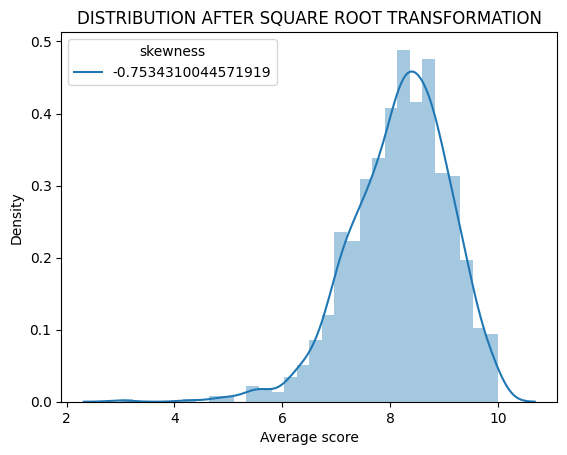

In [162]:
sqrt_target=np.sqrt(de["Average score"])
ax=sns.distplot(sqrt_target)
plt.title("DISTRIBUTION AFTER SQUARE ROOT TRANSFORMATION",)
skewness=str(sqrt_target.skew())
plt.legend([skewness],title=("skewness"))
plt.show()


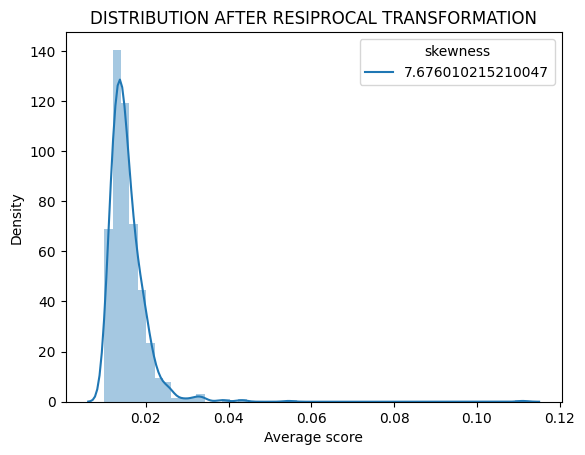

In [163]:
num = de["Average score"].replace(0, np.nan)
resiprocal_target= 1/num
ax=sns.distplot(resiprocal_target, kde = True)
plt.title("DISTRIBUTION AFTER RESIPROCAL TRANSFORMATION",)
skewness=str(resiprocal_target.skew())
plt.legend([skewness],title=("skewness"))
plt.show()


Optimal λ (lambda): 1.408672862239079


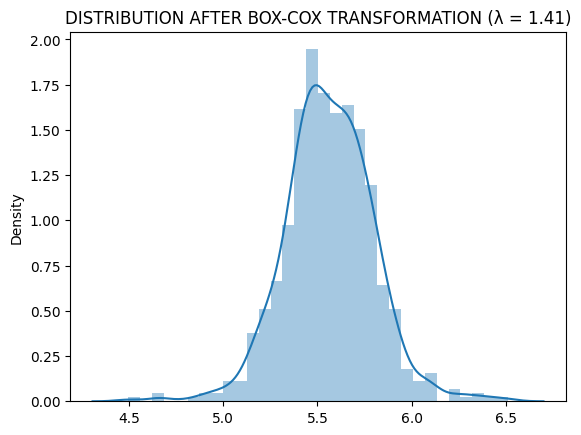

In [164]:
num = de["Average score"]
num = num[num > 0]
num_boxcox, lambda_bc = stats.boxcox(num)
print(f"Optimal λ (lambda): {lambda_bc}")
sns.distplot(chol_boxcox, kde=True)
plt.title(f"DISTRIBUTION AFTER BOX-COX TRANSFORMATION (λ = {lambda_bc:.2f})")
plt.show()


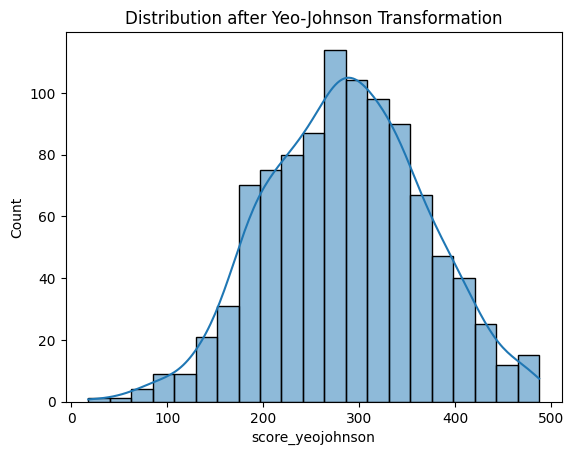

In [166]:
from sklearn.preprocessing import PowerTransformer
data = de[["Average score"]]
pt = PowerTransformer(method='yeo-johnson', standardize=False)
data_yeojohnson = pt.fit_transform(data)
data_yeojohnson_series = pd.Series(data_yeojohnson.flatten(), name="score_yeojohnson")
sns.histplot(data_yeojohnson_series, kde=True)
plt.title("Distribution after Yeo-Johnson Transformation")
plt.show()


# Assignment Exercises

* Complete the six exercises given above as comments in various code blocks.
* Repeat (all or most or as appropriate) the above workbook steps for data engineering and visualization for the 'students-random-number-dataset' already linked to this notebook.
* Plot the distributions discussed in class, other than gaussian and poisson.
* For the dataset in CELL 30-31 above, apply other transformations (not the Log transform) discussed in class.

Submission steps: 
* Clone and Edit this notebook to add all new exercises below this cell.
* Once finished, connect this notebook to github.
* Using the assignment link, join the github classroom by connecting your github account with already available name roster containing your institute email.
* Commit!